In [1]:
# Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Read in the datasets 
content = pd.read_csv('Content.csv')
reactions = pd.read_csv('Reactions.csv')
reaction_types = pd.read_csv('ReactionTypes.csv')

In [3]:
dataframes = [content, reactions, reaction_types]

In [4]:
for df in dataframes:
    print(df.shape)

(1000, 6)
(25553, 5)
(16, 4)


In [5]:
content.nunique()

Unnamed: 0    1000
Content ID    1000
User ID        446
Type             4
Category        41
URL            801
dtype: int64

In [6]:
content['Category'].value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

`41 unique categories`- There are category names that are the same but the versions of the same names are capitalized, lower-case or in quotations. All category names need to be in the same format to get the end result of the top five categories. One way to fix this issue is to remove the quotations from all the words in this series and capitalize the first letter of every word in the series. 

`1000 unique Content ID`

In [7]:
reactions.nunique()

Unnamed: 0    25553
Content ID      980
User ID         500
Type             16
Datetime      25542
dtype: int64

`Reactions on 980 unique Content IDs`

`The type in content df is photo, video, etc versus type in reactions is disgust, love, etc so type is not a matching column for merging in content and reactions df`

`Merging on the unique identifier Content IDs later in the analysis`

In [8]:
# Visual asssessment of each dataset
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [9]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [10]:
content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [11]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [12]:
reactions

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [13]:
reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

`Not all 980 unique Content IDs in reactions df have reactions because there are 980 rows that have null for the series Type`.

`Data Quality`:

`1`: For content df: Completeness issue identified for column URL has 199 missing values. 


`2`: For reactions df: Completeness issue identified for columns User ID and Type- 3019 and 980 missing values    respectively. The series, User ID  has 3019 null values and it can be dropped from the reactions df because there is already a UUID of Content ID in reactions df. 
The Type series cannot be deleted because it is found in both reactions and reaction_types df. However, the rows of the series, Type that contain null values can be deleted because these rows will not be matched with a reaction type hence they will not be matched with a score and will not provide insight in the analysis. 

`3`: For content df: an consisteny issue identified for the category series. There are category names that are the same but the versions of the same names are capitalized, lower-case or in quotations. All category names need to be in the same format to get the end result of the top five categories. One way to fix this issue is to remove the quotations from all the words in this series and capitalize the first letter of every word in the series. 
`Tidiness`:
`1`:Unnamed column can be removed from all columns because it is unnecessary for analysis.


`Define Task`:Remove the column URL, which has 199 missing values by using .drop(series, axis).

`Code`

In [14]:
# Resolving the completeness issue in content and ractions df by dropping URL
content = content.drop(['URL', 'Type'], axis=1)

`Test`

In [15]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Category    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


`Define Task`: Remove the User ID series in reactions and content df by using .drop(series, axis). 

`Code`

In [16]:
reactions = reactions.drop('User ID', axis =1)
content = content.drop('User ID', axis =1)

`Test`

In [17]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: int64(1), object(3)
memory usage: 798.7+ KB


In [18]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   Category    1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


`Define`: Drop the rows in the type series of the reaction_types df containing null values by loc.

`Code`

In [19]:
drop_index = reactions.loc[reactions['Type'].isnull()].index
drop_index = drop_index.tolist()

In [20]:
reactions.drop(drop_index, axis=0, inplace=True)

In [21]:
reactions.isnull().sum()

Unnamed: 0    0
Content ID    0
Type          0
Datetime      0
dtype: int64

`Define`: Unnamed column can be removed from all dfs by using a for loop to remove the series from all dfs at once.

`Code`

In [22]:
dataframes = [content, reactions, reaction_types]

In [23]:
for dfs in dataframes:
    dfs.drop('Unnamed: 0', axis=1, inplace=True)

`Test`

In [24]:
for df in dataframes:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   Category    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    24573 non-null  object
dtypes: object(3)
memory usage: 767.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0

`Define`:All category names need to be in the same format to get the end result of the top five categories. One way to fix this issue is to remove the quotations from all the words in this series and capitalize the first letter of every word in the series. 

Remove quotations by using str.replace

In [25]:
content

,Content ID,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,food
...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,culture


In [26]:
content['Category'] = content['Category'].str.strip('"').str.title()

In [27]:
content['Category'].value_counts()

Technology         73
Animals            72
Travel             69
Science            68
Culture            67
Fitness            66
Food               64
Soccer             64
Healthy Eating     62
Cooking            61
Tennis             59
Education          59
Studying           58
Dogs               58
Public Speaking    50
Veganism           50
Name: Category, dtype: int64

In [28]:
len(content['Category'].value_counts())

16

`The unique number of categories after cleaning up the format of the string is 16`.

`Merging dfs`: 
    
        First merge is the reactions df with the reaction_types on Type because Type series is in both dfs. 

        Second merge is the content df with the reactions df on matching identifier of Content ID.

`Code`

In [29]:
reactions = pd.merge(reactions, reaction_types)

`Datetime series is kept in the dataframe in case the company wants to review the timespan of the interactions with the different content categories`

In [30]:
reactions

,Content ID,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,negative,0
...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,positive,72


In [31]:
content_reactions = pd.merge(content, reactions)

`Test`

In [32]:
content_reactions

,Content ID,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,2021-04-09 02:46:20,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,dislike,2021-06-17 12:22:51,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,dislike,2020-11-09 02:49:59,negative,10
...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,Technology,intrigued,2021-04-09 08:05:56,positive,45
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,Technology,intrigued,2021-02-16 17:17:02,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,Technology,worried,2020-10-31 04:50:14,negative,12
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,Technology,worried,2020-11-04 20:08:31,negative,12


In [33]:
content_reactions['Type'].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Type, dtype: int64

In [34]:
content_reactions.to_csv('data.csv')

In [35]:
content_reactions.groupby('Category').Score.mean().sort_values(ascending=False)

Category
Technology         40.481743
Public Speaking    40.479869
Healthy Eating     40.383809
Education          40.080949
Studying           39.815847
Veganism           39.758814
Culture            39.724940
Soccer             39.658888
Fitness            39.658065
Science            39.625835
Animals            39.517659
Travel             39.392835
Dogs               39.245889
Food               39.244261
Cooking            38.915865
Tennis             37.905873
Name: Score, dtype: float64

### `Conclusion`: 

The top 5 categories are:

1. Technology
2. Public Speaking
3. Healthy Eating
4. Education
5. Studying 

In [36]:
categories_mean = pd.DataFrame(content_reactions.groupby('Category').Score.mean().sort_values(ascending=False))
categories_mean = categories_mean.reset_index()

In [37]:
categories_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  16 non-null     object 
 1   Score     16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


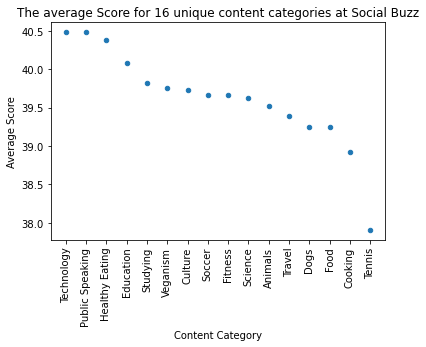

In [38]:
categories_mean.plot(x='Category',  y='Score', kind='scatter')
plt.xticks(rotation=90)
plt.title('The average Score for 16 unique content categories at Social Buzz')
plt.xlabel('Content Category')
plt.ylabel('Average Score')
plt.show()

`How many reactions are there to the most popular category?`


In [39]:
Top_category = content_reactions[content_reactions['Category'] == 'Technology']

In [40]:
Top_category['Type'].value_counts()

adore          129
interested     121
peeking        116
heart          114
cherish        114
want           113
super love     113
hate           112
disgust        110
worried        105
indifferent     98
love            96
dislike         95
scared          88
intrigued       87
like            87
Name: Type, dtype: int64

In [41]:
len(Top_category['Type'].value_counts())

16

`What was the month with the most reactions?`

In [42]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    24573 non-null  object
 3   Sentiment   24573 non-null  object
 4   Score       24573 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [43]:
content_reactions['Month'] = pd.DatetimeIndex(content_reactions['Datetime']).month
content_reactions['Year'] = pd.DatetimeIndex(content_reactions['Datetime']).year

In [44]:
content_reactions['Datetime'] = pd.to_datetime(content_reactions['Datetime'])

In [45]:
content_reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Content ID  24573 non-null  object        
 1   Category    24573 non-null  object        
 2   Type        24573 non-null  object        
 3   Datetime    24573 non-null  datetime64[ns]
 4   Sentiment   24573 non-null  object        
 5   Score       24573 non-null  int64         
 6   Month       24573 non-null  int64         
 7   Year        24573 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.7+ MB


In [46]:
content_reactions[['Month', 'Year']] = content_reactions[['Month', 'Year']].astype(str)

In [47]:
content_reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Content ID  24573 non-null  object        
 1   Category    24573 non-null  object        
 2   Type        24573 non-null  object        
 3   Datetime    24573 non-null  datetime64[ns]
 4   Sentiment   24573 non-null  object        
 5   Score       24573 non-null  int64         
 6   Month       24573 non-null  object        
 7   Year        24573 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.7+ MB


In [48]:
content_reactions['Month_Year'] = content_reactions['Year'] + '-' + content_reactions['Month'].apply(str)
content_reactions

,Content ID,Category,Type,Datetime,Sentiment,Score,Month,Year,Month_Year
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,2020-11-07 09:43:50,negative,0,11,2020,2020-11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,2021-01-06 19:13:01,negative,0,1,2021,2021-1
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,disgust,2021-04-09 02:46:20,negative,0,4,2021,2021-4
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,dislike,2021-06-17 12:22:51,negative,10,6,2021,2021-6
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,Studying,dislike,2020-11-09 02:49:59,negative,10,11,2020,2020-11
...,...,...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,Technology,intrigued,2021-04-09 08:05:56,positive,45,4,2021,2021-4
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,Technology,intrigued,2021-02-16 17:17:02,positive,45,2,2021,2021-2
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,Technology,worried,2020-10-31 04:50:14,negative,12,10,2020,2020-10
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,Technology,worried,2020-11-04 20:08:31,negative,12,11,2020,2020-11


In [80]:
month_year_types = content_reactions['Month_Year'].value_counts().sort_values(ascending=False)
month_year_types

2021-5     2138
2021-1     2126
2020-8     2114
2020-12    2092
2020-7     2070
2020-10    2056
2020-11    2034
2020-9     2022
2021-3     2012
2021-4     1974
2021-2     1914
2021-6     1129
2020-6      892
Name: Month_Year, dtype: int64

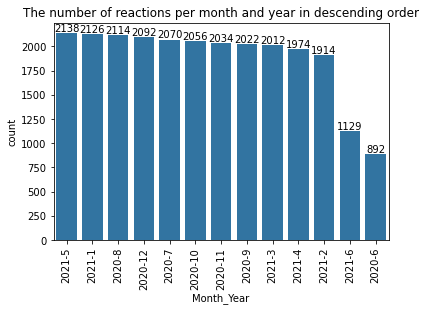

In [83]:
base_color = sb.color_palette()[0]
sb.countplot(data=content_reactions, x='Month_Year', color = base_color, order= month_year_types.index)

for i in range (month_year_types.shape[0]):
    count = month_year_types[i]
    plt.text(i,count+100, count, ha='center', va = 'top')
    
plt.title('The number of reactions per month and year in descending order')
plt.xticks(rotation=90);

In [52]:
#content_reactions['Month'] = pd.DatetimeIndex(content_reactions['Datetime']).month
#popular_month = pd.DataFrame(content_reactions.Month.value_counts())

In [53]:
#popular_month = popular_month.reset_index()

In [54]:
#popular_month = popular_month.rename(columns ={'index':'Month', 'Month': 'Unique_Values'})

In [55]:
#popular_month

In [56]:
#plt.scatter(data=popular_month, x='Month', y='Unique_Values')
#plt.title('The number of reactions for each month')
#plt.xlabel('Month')
#plt.ylabel('Total number of reactions');

`Process followed in this Data Analysis`: 

Data Understanding-The data model, which generated the three datasets with
information on content categories, sections and reaction types 
was reviewed with the team and the unique identifiers were 
recognized for each dataset.

Data Assessment- The three datasets were imported into Jupyter Notebook, 
a tool that allows for programmatic assessment using Python, 
for data analysis. Jupyter Notebook contains both code and text
cells that facilitate an easy step-by-step process of analyzing the data.

Data Cleaning- A programmatic assessment was conducted on the three datasets
(content, reactions, and reaction types) to ensure their quality.
Using Jupyter Notebook, any identified issues with the data's quality 
or organization were programmatically cleaned and a cleaned, master dataset was created.

Uncovering Insights - The master dataset included scores for each reaction type 
within each category type. These scores were grouped and sorted in 
descending order, resulting in the top 5 content categories.
